In [2]:
pip install pandas matplotlib numpy seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('heart.csv')

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
dataset.shape

(1025, 14)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: xlabel='target', ylabel='count'>

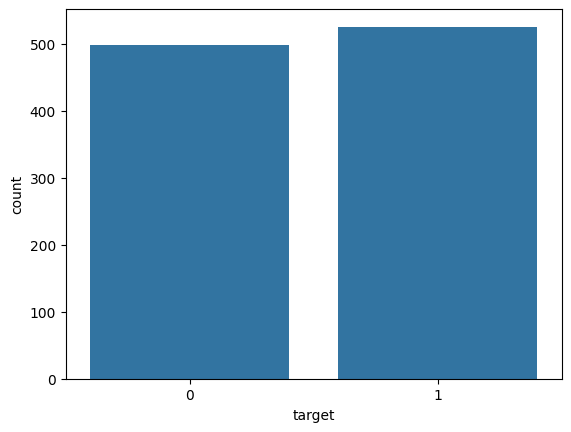

In [8]:
sns.countplot(x='target' , data=dataset)

<Axes: >

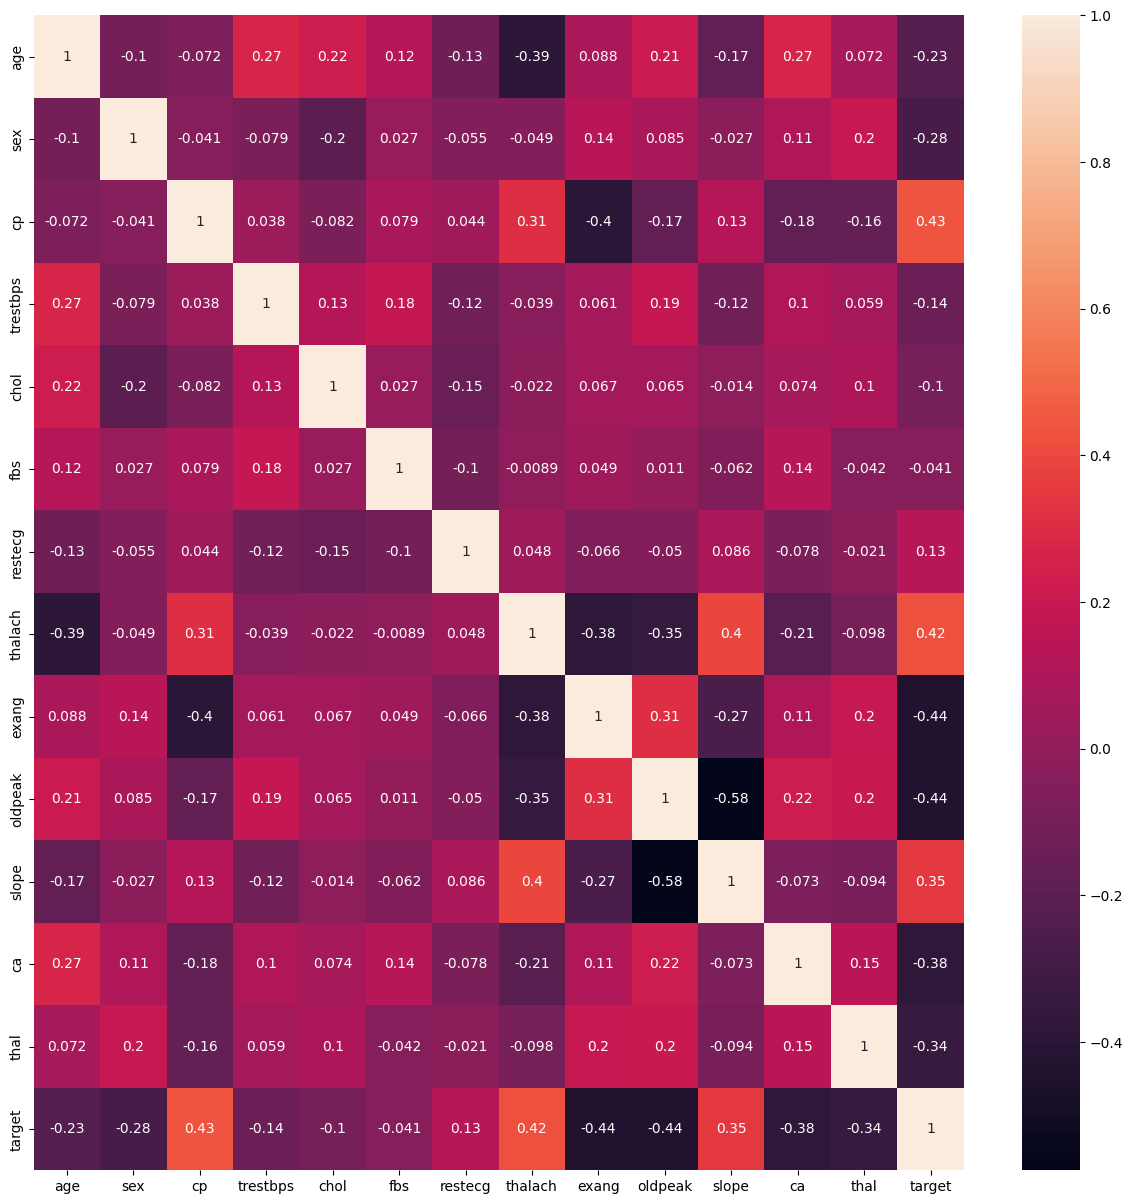

In [9]:
corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True)

Plot histograms for each column

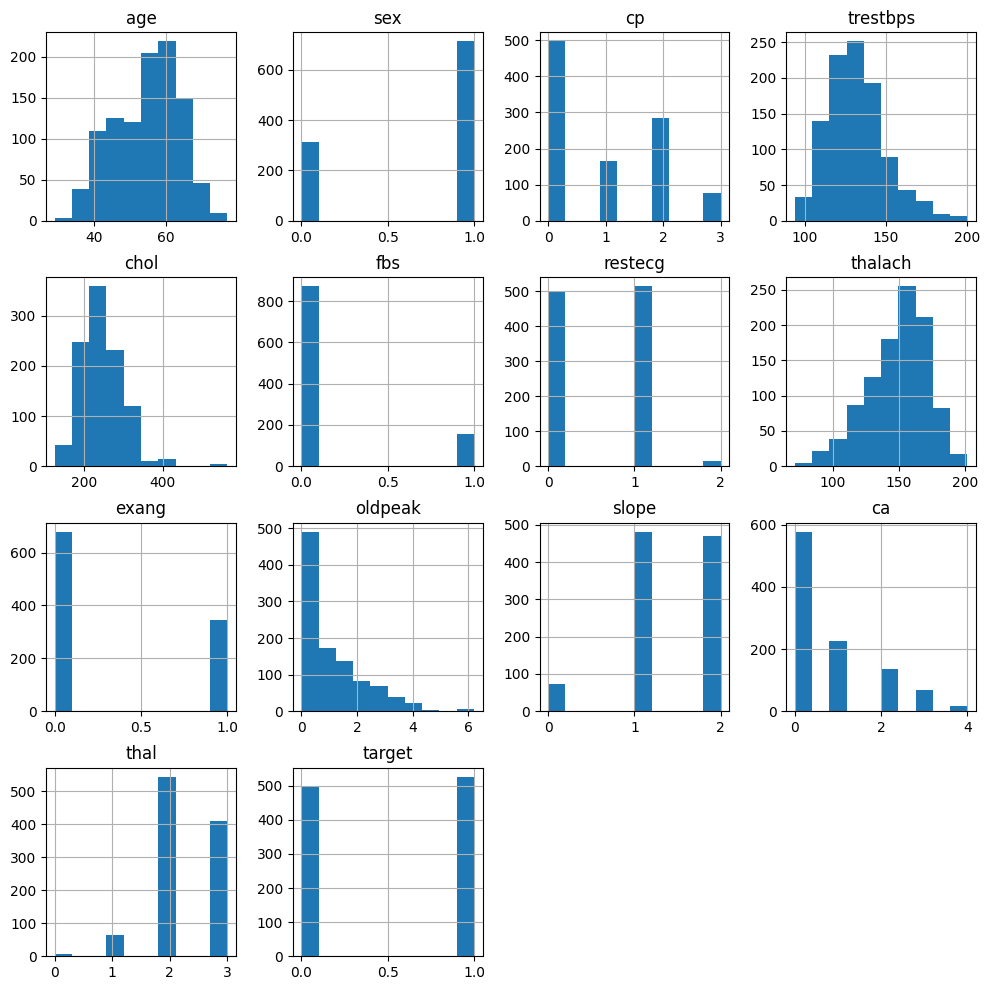

In [10]:
dataset.hist(figsize=(12,12))
plt.show()

Now we need to convert some categorical variables into dummy variables.

In [11]:
dataset2 = pd.get_dummies(dataset , columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [12]:
cols=['cp_0','cp_1','cp_1','cp_2','cp_3','trestbps','chol','restecg_0','restecg_1','restecg_2','thalach']
x=dataset2[cols]
y=dataset.target
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x , y , test_size=0.25 , random_state= 42)

In [15]:
x_train.shape

(768, 11)

In [16]:
x_test.shape

(257, 11)

In [22]:
from sklearn.model_selection import train_test_split
X=dataset.drop('target',axis=1)
y=dataset['target']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape, x_test.shape,y_train.shape,y_test.shape

((820, 13), (257, 11), (820,), (205,))

Train and Evaulate Models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Logistic_Regession': LogisticRegression(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_Forest': RandomForestClassifier(),
    'svc': SVC(),
}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"------------{name}----------------")
    print("Classification Report \n",classification_report(y_test, y_pred))
    print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
    print("\n\n")

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------Logistic_Regession----------------
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       102
           1       0.74      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.78      0.78       205
weighted avg       0.80      0.79      0.78       205

Confusion Matrix 
 [[70 32]
 [12 91]]



------------Decision_Tree----------------
Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix 
 [[102   0]
 [  3 100]]



------------Random_Forest----------------
Classification Report 
               precision    recall  f1-score   support

  

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 1.04257207, -0.43033148, -0.43033148, ...,  1.01310672,
        -0.1148591 ,  0.79886933],
       [ 1.04257207, -0.43033148, -0.43033148, ..., -0.98706284,
        -0.1148591 , -0.37564531],
       [-0.9591663 ,  2.32379001,  2.32379001, ..., -0.98706284,
        -0.1148591 , -0.41914585],
       ...,
       [ 1.04257207, -0.43033148, -0.43033148, ...,  1.01310672,
        -0.1148591 ,  1.01637204],
       [ 1.04257207, -0.43033148, -0.43033148, ...,  1.01310672,
        -0.1148591 ,  0.49436554],
       [ 1.04257207, -0.43033148, -0.43033148, ...,  1.01310672,
        -0.1148591 ,  0.45086499]], shape=(768, 11))

<Axes: >

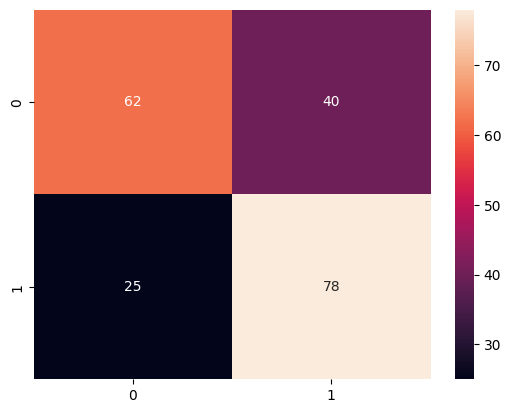

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

Selecting Best Model

In [35]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Save the model

In [38]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))